In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import random

### Part One: 
#### Go to the Social Security Administration US births website and select the births table there and copy it to your clipboard. Use the pandas read_clipboard function to read the table into a pandas DataFrame, and use matplotlib to plot male and female births for the years covered in the data. Put this in an ipython notebook file. In the same notebook, use Python to get a list of male and female names from these files This data is broken down by year of birth.

In [656]:
df = pd.read_clipboard()
df

,birth,Male,Female,Total
0,1880,"118,399","97,606","216,005"
1,1881,"108,282","98,855","207,137"
2,1882,"122,031","115,695","237,726"
3,1883,"112,475","120,059","232,534"
4,1884,"122,738","137,585","260,323"
...,...,...,...,...
135,2015,"2,041,684","1,948,338","3,990,022"
136,2016,"2,022,397","1,932,697","3,955,094"
137,2017,"1,974,842","1,885,327","3,860,169"
138,2018,"1,938,110","1,854,346","3,792,456"


In [708]:
#rename birth column to Year
birthsdf = df.rename(columns={"birth": "Year"})
birthsdf

,Year,Male,Female,Total
0,1880,"118,399","97,606","216,005"
1,1881,"108,282","98,855","207,137"
2,1882,"122,031","115,695","237,726"
3,1883,"112,475","120,059","232,534"
4,1884,"122,738","137,585","260,323"
...,...,...,...,...
135,2015,"2,041,684","1,948,338","3,990,022"
136,2016,"2,022,397","1,932,697","3,955,094"
137,2017,"1,974,842","1,885,327","3,860,169"
138,2018,"1,938,110","1,854,346","3,792,456"


In [709]:
#turn numbers from strings into float values
birthsdf = birthsdf.replace(',','', regex=True).astype(float)

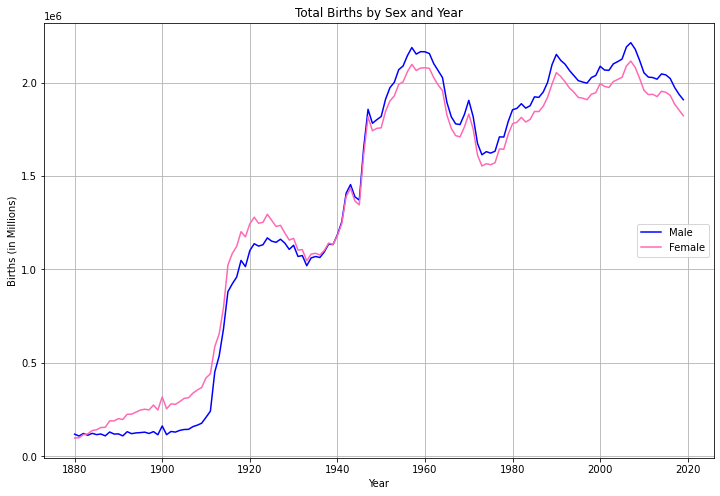

In [710]:
plt.plot('Year', 'Male', data = birthsdf, color = 'blue', label = 'Male')
plt.plot('Year', 'Female', data = birthsdf, color = 'hotpink', label = 'Female')
plt.xlabel('Year')
plt.ylabel('Births (in Millions)')
plt.title('Total Births by Sex and Year')
plt.legend(loc = 'center right')
size = 2
## JMG This is the figure instance itself, not the params of the figure.
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.grid()
plt.show()

In [1]:
import pandas as pd
years = range(1881,2011)
pieces = []
columns = ['name', 'sex', 'births']


for year in years:
    path = f'names/yob{year}.txt'
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

In [3]:
print(names.head())
print(names.tail())

        name sex  births  year
0       Mary   F    6919  1881
1       Anna   F    2698  1881
2       Emma   F    2034  1881
3  Elizabeth   F    1852  1881
4   Margaret   F    1658  1881
              name sex  births  year
1688779    Zymaire   M       5  2010
1688780     Zyonne   M       5  2010
1688781  Zyquarius   M       5  2010
1688782      Zyran   M       5  2010
1688783      Zzyzx   M       5  2010


### Part Two: 
#### Aggregate the data for all years from the website (see the examples in the Pandas notebook general_pandas_intro). Find the set of all male names and the set of all female names. For each letter find its frequency as a last letter in male names and in female names, using Python Counters (from collections import Counter). Use matplotlib to draw a single plot that shows contrast between the last-letter frequencies for male and female names; x-axis is letters; y-axis is frequencies.

In [4]:
f_names = names[names.sex == 'F']
m_names = names[names.sex == 'M']
print("Female Names Head")
print(f_names.head())
print("Male Names Tail")
print(m_names.tail())

Female Names Head
        name sex  births  year
0       Mary   F    6919  1881
1       Anna   F    2698  1881
2       Emma   F    2034  1881
3  Elizabeth   F    1852  1881
4   Margaret   F    1658  1881
Male Names Tail
              name sex  births  year
1688779    Zymaire   M       5  2010
1688780     Zyonne   M       5  2010
1688781  Zyquarius   M       5  2010
1688782      Zyran   M       5  2010
1688783      Zzyzx   M       5  2010


In [5]:
#set of male names
m_set = set(m_names['name'])
m_set

{'Tychicus',
 'Finnis',
 'Kesuan',
 'Nycere',
 'Chans',
 'Oluwamayowa',
 'Zolan',
 'Rishon',
 'Reinald',
 'Abdel',
 'Orwin',
 'Ham',
 'Eliu',
 'Nicklos',
 'Maximili',
 'Logann',
 'Syrus',
 'Conor',
 'Calogero',
 'Abdourahman',
 'Hassam',
 'Yahye',
 'Cleone',
 'Efram',
 'Krystof',
 'Jerom',
 'Curron',
 'Gregroy',
 'Johnmarco',
 'Zimri',
 'Pape',
 'Cloys',
 'Juaquin',
 'Broden',
 'Kartier',
 'Jennifer',
 'Brandan',
 'Shaquell',
 'Jasan',
 'Etienne',
 'Kahne',
 'Presley',
 'Kingslee',
 'Cayler',
 'Simar',
 'Averion',
 'Bernadino',
 'Cetric',
 'Paris',
 'Ison',
 'Mizael',
 'Yardley',
 'Khaidyn',
 'Krystofer',
 'Flournoy',
 'Jeannette',
 'Jareal',
 'Marquarious',
 'Aza',
 'Gianncarlo',
 'Bisher',
 'Karle',
 'Cire',
 'Riku',
 'Tyvell',
 'Davor',
 'Daxen',
 'Caine',
 'Ibe',
 'Aftab',
 'Shaquelle',
 'Deamontae',
 'Ingram',
 'Antoan',
 'Ezreal',
 'Monterious',
 'Tyronza',
 'Demicheal',
 'Dowl',
 'Ludy',
 'Sammul',
 'Joshuar',
 'Darel',
 'Junor',
 'Angelino',
 'Atharva',
 'Prithvi',
 'Randen',
 

In [6]:
#set of female names
f_set = set(f_names['name'])
f_set

{'Tyice',
 'Quatasia',
 'Kalkidan',
 'Wandalene',
 'Kynslie',
 'Keyiana',
 'Sofee',
 'Shavna',
 'Britley',
 'Edilia',
 'Maralyn',
 'Aileny',
 'Ravae',
 'Tamarea',
 'Alese',
 'Sheraine',
 'Brooksey',
 'Maicie',
 'Iiana',
 'Lueella',
 'Genneth',
 'Karenda',
 'Breshayla',
 'Ludmila',
 'Martyna',
 'Maripaz',
 'Ermma',
 'Dorisann',
 'Elliyana',
 'Lamae',
 'Niche',
 'Alaida',
 'Tearia',
 'Kemoria',
 'Jasleene',
 'Angelee',
 'Logann',
 'Fabienne',
 'Takedra',
 'Gwendlyon',
 'Conor',
 'Kiyra',
 'Kaaliyah',
 'Michaelina',
 'Alise',
 'Dondria',
 'Naheed',
 'Abrie',
 'Cleone',
 'Wisper',
 'Cherrye',
 'Lianette',
 'Kristasia',
 'Calliope',
 'Zamariya',
 'Zimri',
 'Johvanna',
 'Novaleigh',
 'Rakelle',
 'Leinani',
 'Jalyza',
 'Renauta',
 'Jennifer',
 'Leesa',
 'Ysobel',
 'Dawna',
 'Graceann',
 'Myrta',
 'Marietherese',
 'Amandalynn',
 'Brandan',
 'Shaquell',
 'Skyelynn',
 'Dariana',
 'Radiya',
 'Etienne',
 'Kahne',
 'Schannon',
 'Amyya',
 'Ileen',
 'Barnette',
 'Serenaty',
 'Thesa',
 'Vernika',
 'Pr

JMG: This iterates through the sequence of male names, counting the same name multiple times if it has been used in multiple years.  This means that the last letters of names that arise in only a few years will be counted fewer times.  This is **not** the same as doing the counts for the set of male names (per the instructions).  -2

In [14]:
m_last_letter_freq = Counter()
#JMG Not using the set as requested
#for name in m_names['name']:  ('a', 24564) ...
for name in m_set:  # ('a', 1757)
    m_last_letter_freq[name[-1]] += 1
sorted_m_last_letter_freq = sorted(m_last_letter_freq.items())
sorted_m_last_letter_freq

[('a', 1757),
 ('b', 231),
 ('c', 237),
 ('d', 1473),
 ('e', 4451),
 ('f', 154),
 ('g', 279),
 ('h', 1168),
 ('i', 1587),
 ('j', 94),
 ('k', 812),
 ('l', 2938),
 ('m', 803),
 ('n', 9679),
 ('o', 2073),
 ('p', 108),
 ('q', 54),
 ('r', 2254),
 ('s', 2727),
 ('t', 844),
 ('u', 237),
 ('v', 109),
 ('w', 110),
 ('x', 106),
 ('y', 2137),
 ('z', 319)]

In [15]:
f_last_letter_freq = Counter()
#for name in f_names['name']:
for name in f_set: 
    f_last_letter_freq[name[-1]] += 1
sorted_f_last_letter_freq = sorted(f_last_letter_freq.items())
sorted_f_last_letter_freq

[('a', 26199),
 ('b', 38),
 ('c', 53),
 ('d', 301),
 ('e', 11501),
 ('f', 12),
 ('g', 135),
 ('h', 3921),
 ('i', 3357),
 ('j', 25),
 ('k', 93),
 ('l', 2043),
 ('m', 224),
 ('n', 6351),
 ('o', 569),
 ('p', 25),
 ('q', 10),
 ('r', 854),
 ('s', 1124),
 ('t', 618),
 ('u', 185),
 ('v', 14),
 ('w', 29),
 ('x', 54),
 ('y', 3501),
 ('z', 170)]

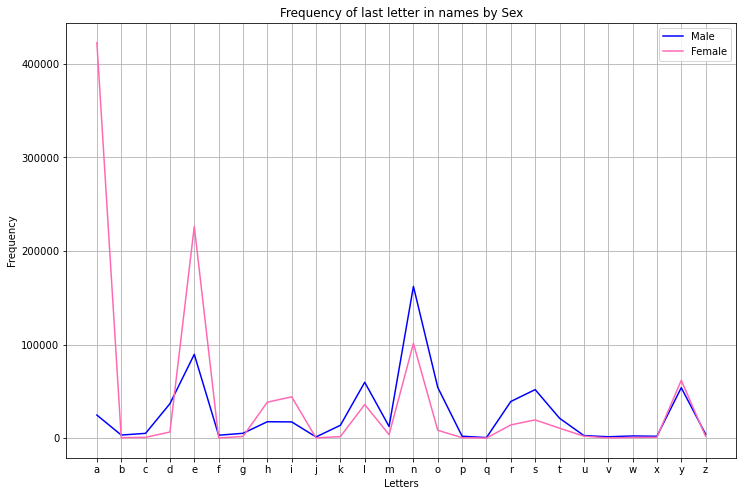

In [718]:
# JMG omitted import in notebook. OrderedDict
m_last_letter_freq_asc = OrderedDict(sorted_m_last_letter_freq)
f_last_letter_freq_asc = OrderedDict(sorted_f_last_letter_freq)
plt.plot(range(len(m_last_letter_freq_asc)), m_last_letter_freq_asc.values(), color = 'blue', label = 'Male')
plt.plot(range(len(f_last_letter_freq_asc)), f_last_letter_freq_asc.values(), color = 'hotpink', label = 'Female')
plt.xticks(range(len(m_last_letter_freq_asc)), m_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.title('Frequency of last letter in names by Sex')
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.grid()
plt.show()

### Part Three: 
#### Another plot. The x-axis is names; the y-axis is frequencies. Aggregate the data for female names into decades (10 year increments). Produce a plot that contains an 1880s line, a 1940s line, and a 1990s line. There is a display issue here. There are too many names to just write them out on the x-axis. Try to devise an informative way of displaying the data that tells a story about fahsions in names change.

In [719]:
#separate f_names by decade and include only names associated with amount of births
f_1880s = f_names[f_names.year.isin(range(1880,1890))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1890s = f_names[f_names.year.isin(range(1890,1900))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1900s = f_names[f_names.year.isin(range(1900,1910))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1910s = f_names[f_names.year.isin(range(1910,1920))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1920s = f_names[f_names.year.isin(range(1920,1930))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1930s = f_names[f_names.year.isin(range(1930,1940))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1940s = f_names[f_names.year.isin(range(1940,1950))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1950s = f_names[f_names.year.isin(range(1950,1960))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1960s = f_names[f_names.year.isin(range(1960,1970))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1970s = f_names[f_names.year.isin(range(1970,1980))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1980s = f_names[f_names.year.isin(range(1980,1990))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_1990s = f_names[f_names.year.isin(range(1990,2000))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_2000s = f_names[f_names.year.isin(range(2000,2010))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()
f_2010s = f_names[f_names.year.isin(range(2010,2011))].drop(columns=['sex','year'],axis=1).groupby(by=['name'],as_index=False)['births'].sum()

print(f_1880s.head())
print(f_1880s.tail())

      name  births
0    Abbie     858
1     Abby      58
2  Abigail     121
3      Ada    7771
4     Adah     306
        name  births
2046   Zonie       5
2047    Zora     387
2048    Zula     314
2049  Zulema       5
2050    Zuma       5


In [720]:
#add percentage of total births per name for the decade
f_1880s['%'] = (f_1880s['births'] / f_1880s['births'].sum())*100
f_1880s.sort_values(by = ['births'], ascending = False).head(n = 10)

,name,births,%
1368,Mary,84607,6.925203
122,Anna,35555,2.910227
643,Emma,23401,1.915405
597,Elizabeth,23068,1.888148
1325,Margaret,20222,1.655199
1439,Minnie,19978,1.635228
240,Bertha,16943,1.386808
907,Ida,16811,1.376004
376,Clara,16491,1.349812
132,Annie,15769,1.290715


In [721]:
f_1940s['%'] = (f_1940s['births'] / f_1940s['births'].sum())*100
f_1940s.sort_values(by = ['births'], ascending = False).head(n = 10)

,name,births,%
6337,Mary,639863,4.418656
5411,Linda,531515,3.670445
716,Barbara,425141,2.935865
7308,Patricia,411330,2.840492
1220,Carol,292250,2.018170
8127,Sandra,265466,1.833209
6870,Nancy,251977,1.740059
8288,Sharon,221186,1.527428
4629,Judith,217972,1.505233
8635,Susan,211961,1.463724


In [722]:
f_1990s['%'] = (f_1990s['births'] / f_1990s['births'].sum())*100
f_1990s.sort_values(by = ['births'], ascending = False).head(n = 10)

,name,births,%
12723,Jessica,303008,1.684111
2881,Ashley,301749,1.677113
9015,Emily,237189,1.318290
24326,Sarah,224091,1.245492
24147,Samantha,223963,1.244781
1421,Amanda,190962,1.061362
4244,Brittany,190799,1.060456
8809,Elizabeth,172484,0.958662
28056,Taylor,169000,0.939298
19687,Megan,160334,0.891132


In [723]:
f_1880s_top5 = f_1880s.sort_values(by = ['births'],ascending = False).head(n = 4)
f_1940s_top5 = f_1940s.sort_values(by = ['births'],ascending = False).head(n = 4)
f_1990s_top5 = f_1990s.sort_values(by = ['births'],ascending = False).head(n = 4)

In [724]:
f_1880s_top5['decade'] = '1880s'
f_1940s_top5['decade'] = '1940s'
f_1990s_top5['decade'] = '1990s'

In [725]:
#combine the three decades into one dataframe
frames = [f_1880s_top5, f_1940s_top5, f_1990s_top5]
columns = ["name","births","%","decade"]

req_decades = pd.DataFrame(pd.concat(frames))
req_decades.columns = columns

decades_table = pd.pivot_table(req_decades, index=['decade'], values = ['%'], columns = ['name'])
decades_table.head()
decades_table['%']

name,Anna,Ashley,Barbara,Elizabeth,Emily,Emma,Jessica,Linda,Mary,Patricia,Sarah
decade,,,,,,,,,,,
1880s,2.910227,NaN,NaN,1.888148,NaN,1.915405,NaN,NaN,6.925203,NaN,NaN
1940s,NaN,NaN,2.935865,NaN,NaN,NaN,NaN,3.670445,4.418656,2.840492,NaN
1990s,NaN,1.677113,NaN,NaN,1.31829,NaN,1.684111,NaN,NaN,NaN,1.245492


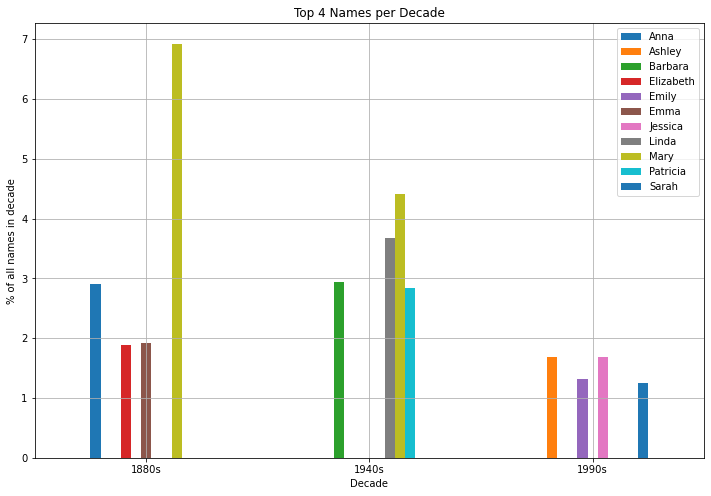

In [726]:
decades_table['%'].plot(kind = 'bar', rot = 0, title = 'Top 4 Names per Decade')
plt.legend(loc = 'upper right')
plt.ylabel('% of all names in decade')
plt.xlabel('Decade')
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.grid()
plt.show()

### Part Four:
#### Train a classifier that distinguishes male names from female names. The features should be the last three letters in the names and the first three letters. If a name has fewer than six letters, it is okay for a letter to be represented both as a first letter and as a last letter. (This strategy guarantees that all names have the same length representation). You will have to make a decision about what to do about ambiguous names (Lee, Sam, Pat), but don’t simply exclude them. Note: There are different interesting ways to deal with this issue, not just one answer. You should ask if you are unsure about your solution.
#### If a name has fewer than three letters (‘Al’), pad it with spaces and use the spaces as your representation (‘Al’ => ‘Al ‘) and the first three letters are [‘A’, ‘l’, ‘ ‘] and the last three letters are [‘A’, ‘l’, ‘ ‘]. Separate your names into training and test names.

In [681]:
#define first and last three letters as features with special case of padding space onto names with less than 3 letters
def gender_features(name):
    n = len(name)
    if n < 3:
        name = name + ' '*(3-n)
    return {'first_3': name[:3].lower(), 'last_3': name[len(name)-3:].lower()}
gender_features('Al')

{'first_3': 'al ', 'last_3': 'al '}

In [682]:
uniq_m_names = list(set(m_names.name))
uniq_f_names = list(set(f_names.name))

In [683]:
labeled_names = ([(name, 'male') for name in uniq_m_names] + [(name, 'female') for name in uniq_f_names])

In [684]:
split_point = int(0.9*len(labeled_names))

In [685]:
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[:split_point], featuresets[split_point:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [686]:
print(nltk.classify.accuracy(classifier, test_set))

0.8137544574630667


In [687]:
classifier.show_most_informative_features(10)

Most Informative Features
                 first_3 = 'abd'            male : female =     95.5 : 1.0
                  last_3 = 'eta'          female : male   =     57.4 : 1.0
                  last_3 = 'sia'          female : male   =     41.4 : 1.0
                  last_3 = 'mes'            male : female =     39.7 : 1.0
                  last_3 = 'ano'            male : female =     37.7 : 1.0
                  last_3 = 'yia'          female : male   =     37.4 : 1.0
                  last_3 = 'eah'          female : male   =     34.0 : 1.0
                  last_3 = 'eim'            male : female =     33.4 : 1.0
                  last_3 = 'ohn'            male : female =     32.5 : 1.0
                  last_3 = 'yna'          female : male   =     32.3 : 1.0


### Extra credit:
#### Does it help to make the decade a feature?

In [688]:
#defines the same as the first gender features but adds year for processing the decade
def gender_features_decade(name,year):
    n = len(name)
    if n < 3:
        name = name + ' '*(3-n)
    return {'first_3': name[:3].lower(), 'last_3': name[len(name)-3:].lower(), 'decade': str(year)[:3]}
gender_features_decade('Al',1992)

{'first_3': 'al ', 'last_3': 'al ', 'decade': '199'}

In [689]:
uniq_m_names_decade = list(zip(m_names.name, m_names.year))
uniq_f_names_decade = list(zip(f_names.name, f_names.year))

In [690]:
labeled_names_decade = ([(name, year, 'male') for name,year in uniq_m_names_decade] + [(name, year, 'female') for name,year in uniq_f_names_decade])

In [691]:
random.shuffle(labeled_names_decade)
featuresets_decade = [(gender_features_decade(n,year), gender) for (n, year, gender) in labeled_names_decade]
train_set_decade, test_set_decade = featuresets_decade[:split_point], featuresets_decade[split_point:]
classifier_decade = nltk.NaiveBayesClassifier.train(train_set_decade)

In [692]:
print(nltk.classify.accuracy(classifier_decade, test_set_decade))

0.8341131130455647


In [693]:
classifier_decade.show_most_informative_features(10)

Most Informative Features
                  last_3 = 'ino'            male : female =    127.5 : 1.0
                  last_3 = 'ldo'            male : female =     92.9 : 1.0
                  last_3 = 'yla'          female : male   =     90.7 : 1.0
                  last_3 = 'sia'          female : male   =     68.7 : 1.0
                  last_3 = 'yna'          female : male   =     63.8 : 1.0
                  last_3 = 'nae'          female : male   =     59.6 : 1.0
                  last_3 = 'tia'          female : male   =     45.9 : 1.0
                  last_3 = 'tta'          female : male   =     44.6 : 1.0
                  last_3 = 'eda'          female : male   =     44.0 : 1.0
                  last_3 = 'ico'            male : female =     42.9 : 1.0


Yes, adding decade as a feature does help but only marginally. Classification accuracy increases by about 1-2% compared to classification without using the decade as a feature.